<div style="text-align: center"><img src="https://www.python.org/static/img/python-logo.png"></div>

# An informal introduction to Python

Python is a popular programming language that is reliable, flexible, easy to learn, free to use on all operating systems, and supported by both a strong developer community and many free libraries. Python supports all manners of development, including web applications, web services, desktop apps, scripting, data science, scientific computing, and Jupyter notebooks. Python is a language used by many universities, scientists, casual developers, and professional developers alike.

You can learn more about the language on [python.org](https://www.python.org/) and [Python for Beginners](https://www.python.org/about/gettingstarted/).

This walkthrough is a Jupyter notebook version of the [python.org introductory tutorial](https://docs.python.org/3.5/tutorial/introduction.html), with some edits and amendments. Because all the code is inside code cells, you can just run each code cell inline rather than using a separate Python interactive window.

This introduction is written for Python 3.6.7 but is generally applicable to other Python 3.x versions. 

The original material is Copyright (c) 2001-2018 Python Software Foundation.

> **Note**: This notebook is designed to have you run code cells one by one, and several code cells contain deliberate errors for demonstration purposes. As a result, if you use the **Cell** > **Run All** command, some code cells past the error won't be run. To resume running the code in each case, use **Cell** > **Run All Below** from the cell after the error.

## Comments

Many of the examples in this notebook include comments. Comments in Python start with the hash character, `#`, and extend to the end of the physical line. A comment may appear at the start of a line or following whitespace or code, but not within a string literal. A hash character within a string literal is just a hash character. Since comments are to clarify code and are not interpreted by Python, they may be omitted when typing in examples.

Some examples:

In [1]:
# this is the first comment
spam = 1  # and this is the second comment
          # ... and now a third!
text = "# This is not a comment because it's inside quotes."
print(text)
print(text)

# This is not a comment because it's inside quotes.
# This is not a comment because it's inside quotes.


## Explore basic data types

Let's try some simple Python commands to explore numbers, strings, and lists.

### Numbers

The Python interpreter can act as a simple calculator: type an expression at it outputs the value.

Expression syntax is straightforward: the operators `+`, `-`, `*` and `/` work just like in most other programming languages (such as Pascal or C); parentheses (`()`) can be used for grouping and order or precedence. For example:

In [2]:
2 + 2 + 3

7

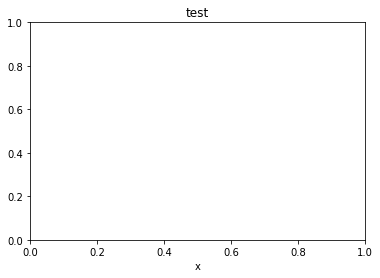

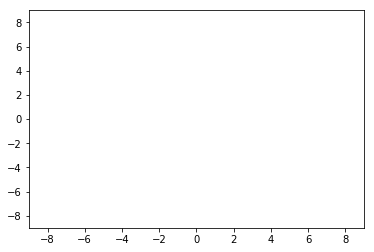

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

In [3]:
50 - 5*6

20

In [4]:
(50 - 5*6) / 4

5.0

In [5]:
8 / 5  # Division always returns a floating point number.

1.6

The integer numbers (e.g. `2`, `4`, `20`) have type [`int`](https://docs.python.org/3.5/library/functions.html#int), the ones with a fractional part (e.g. `5.0`, `1.6`) have type [`float`](https://docs.python.org/3.5/library/functions.html#float). We'll see more about numeric types later in the tutorial.

Division (`/`) always returns a float. To do [floor division](https://docs.python.org/3.5/glossary.html#term-floor-division) and get an integer result (discarding any fractional result) you can use the `//` operator; to calculate the remainder you can use `%`:

In [6]:
17 / 3  # Classic division returns a float.

5.666666666666667

In [7]:
17 // 3  # Floor division discards the fractional part.

5

In [8]:
17 % 3  # The % operator returns the remainder of the division.

2

In [9]:
5 * 3 + 2  # result * divisor + remainder

17

Use the `**` operator to calculate powers:

In [10]:
5 ** 2  # 5 squared

25

In [11]:
2 ** 7  # 2 to the power of 7

128

`**` has higher precedence than `-`; if you want a negative base, use parentheses:

In [12]:
-3**2  # Same as -(3**2)

-9

In [13]:
(-3)**2

9

The equal sign (`=`) assigns a value to a variable:

In [14]:
width = 20
height = 5 * 90
width * height

9000

If a variable is not "defined" (assigned a value), using it produces an error:

In [16]:
n  # Try to access an undefined variable.

NameError: name 'n' is not defined

Python provides full support for floating point numbers; operators with mixed type operands convert the integer operand to floating point:

In [34]:
3 * 3.75 / 1.5

7.5

In [35]:
7.0 / 2

3.5

In interactive mode and in Jupyter notebooks, the last printed expression is assigned to the variable `_`. This means that when you're using Python as a desk calculator, its somewhat easier to continue calculations. For example:

In [36]:
tax = 12.5 / 100
price = 100.50
price * tax

12.5625

In [37]:
price + _

113.0625

In [38]:
round(_, 2)

113.06

Treat the `_` variable as read-only. Don't explicitly assign a value to it--doing so creates an independent local variable with the same name, thereby masking the built-in variable with its magic behavior.

In addition to `int` and `float`, Python supports other types of numbers, such as [`Decimal`](https://docs.python.org/3.5/library/decimal.html#decimal.Decimal) and [`Fraction`](https://docs.python.org/3.5/library/fractions.html#fractions.Fraction). Python also has built-in support for [complex numbers](https://docs.python.org/3.5/library/stdtypes.html#typesnumeric), and uses the `j` or `J` suffix to indicate the imaginary part (e.g. `3+5j`).

### Strings

Besides numbers, Python can also manipulate strings. Strings can enclosed in single quotes (`'...'`) or double quotes (`"..."`) with the same result. Use `\` to escape quotes, that is, to use a quote within the string itself:

In [39]:
'spam eggs'  # Single quotes.

'spam eggs'

In [40]:
'doesn\'t'  # Use \' to escape the single quote...

"doesn't"

In [18]:
"doesn't"  # ...or use double quotes instead.

"doesn't"

In [19]:
'"Yes," he said.'

'"Yes," he said.'

In [20]:
"\"Yes,\" he said."

'"Yes," he said.'

In [21]:
'"Isn\'t," she said.'

'"Isn\'t," she said.'

In the interactive interpreter and Jupyter notebooks, the output string is enclosed in quotes and special characters are escaped with backslashes. Although this output sometimes looks different from the input (the enclosing quotes could change), the two strings are equivalent. The string is enclosed in double quotes if the string contains a single quote and no double quotes, otherwise its enclosed in single quotes. The [`print()`](https://docs.python.org/3.6/library/functions.html#print) function produces a more readable output by omitting the enclosing quotes and by printing escaped and special characters:

In [22]:
'"Isn\'t," she said.'

'"Isn\'t," she said.'

In [23]:
print('"Isn\'t," she said.')

"Isn't," she said.


In [24]:
s = 'First line.\nSecond line.'  # \n means newline.
s  # Without print(), \n is included in the output.

'First line.\nSecond line.'

In [25]:
print(s)  # With print(), \n produces a new line.

First line.
Second line.


If you don't want escaped characters (prefaced by `\`) to be interpreted as special characters, use *raw strings* by adding an `r` before the first quote:

In [26]:
print('C:\some\name')  # Here \n means newline!

C:\some
ame


In [27]:
print(r'C:\some\name')  # Note the r before the quote.

C:\some\name


String literals can span multiple lines and are delineated by triple-quotes: `"""..."""` or `'''...'''`. End of lines are automatically included in the string, but it's possible to prevent this by adding a `\` at the end of the line. For example, without a `\`, the following example includes an extra line at the beginning of the output:

In [28]:
print("""
Usage: thingy [OPTIONS]
     -h                        Display this usage message
     -H hostname               Hostname to connect to
""")


Usage: thingy [OPTIONS]
     -h                        Display this usage message
     -H hostname               Hostname to connect to



Adding a `\` removes that extra line:

In [29]:
print("""\
Usage: thingy [OPTIONS]
     -h                        Display this usage message
     -H hostname               Hostname to connect to
""")

Usage: thingy [OPTIONS]
     -h                        Display this usage message
     -H hostname               Hostname to connect to



Because Python doesn't provide a means for creating multi-line comments, developers often just use triple quotes for this purpose. In a Jupyter notebook, however, such quotes define a string literal which appears as the output of a code cell:

In [30]:
"""
Everything between the first three quotes, including new lines,
is part of the multi-line comment. Technically, the Python interpreter
simply sees the comment as a string, and because it's not otherwise
used in code, the string is ignored. Convenient, eh?
"""

"\nEverything between the first three quotes, including new lines,\nis part of the multi-line comment. Technically, the Python interpreter\nsimply sees the comment as a string, and because it's not otherwise\nused in code, the string is ignored. Convenient, eh?\n"

For this reason, it's best in notebooks to use the `#` comment character at the beginning of each line, or better still, just use a Markdown cell!

Strings can be *concatenated* (glued together) with the `+` operator, and repeated with `*`:

In [31]:
# 3 times 'un', followed by 'ium'
3 * 'un' + 'ium'

'unununium'

Two or more *string literals* (that is, the values enclosed in quotes) placed next to each other are automatically concatenated:

In [32]:
'Py' 'thon'

'Python'

Automatic concatenation works only with two literals; it does not work with variables or expressions, so the following cell produces an error:

In [33]:
prefix = 'Py'
prefix 'thon'  # Can't concatenate a variable and a string literal.

SyntaxError: invalid syntax (<ipython-input-33-00ad70cd97bc>, line 2)

The following cell likewise produces an error:

In [41]:
('un' * 3) 'ium'

SyntaxError: invalid syntax (<ipython-input-41-f4764cbe42a8>, line 1)

To concatenate variables, or a variable and a literal, use `+`:

In [43]:
prefix = 'Py'
prefix + 'thon'

'Python'

Automatic concatenation is particularly useful when you want to break up long strings:

In [44]:
text = ('Put several strings within parentheses '
            'to have them joined together.')
text

'Put several strings within parentheses to have them joined together.'

Strings can be *indexed* (subscripted), with the first character having index 0. There is no separate character type; a character is simply a string of size one:

In [45]:
word = 'Python'
word[0]  # Character in position 0.

'P'

In [46]:
word[5]  # Character in position 5.

'n'

Indices may also be negative numbers, which means to start counting from the end of the string. Note that because -0 is the same as 0, negative indices start from -1:

In [47]:
word[-1]  # Last character.

'n'

In [48]:
word[-2]  # Second-last character.

'o'

In [49]:
word[-6]

'P'

In addition to indexing, which extracts individual characters, Python also supports *slicing*, which extracts a substring. To slide, you indicate a *range* in the format `start:end`, where the start position is included but the end position is excluded:

In [50]:
word[0:2]  # Characters from position 0 (included) to 2 (excluded).

'Py'

In [51]:
word[2:5]  # Characters from position 2 (included) to 5 (excluded).

'tho'

If you omit either position, the default start position is 0 and the default end is the length of the string:

In [52]:
word[:2]   # Character from the beginning to position 2 (excluded).

'Py'

In [53]:
word[4:]  # Characters from position 4 (included) to the end.

'on'

In [54]:
word[-2:] # Characters from the second-last (included) to the end.

'on'

This characteristic means that `s[:i] + s[i:]` is always equal to `s`:

In [55]:
word[:2] + word[2:]

'Python'

In [56]:
word[:4] + word[4:]

'Python'

One way to remember how slices work is to think of the indices as pointing between characters, with the left edge of the first character numbered 0. Then the right edge of the last character of a string of *n* characters has index *n*. For example:

The first row of numbers gives the position of the indices 0...6 in the string; the second row gives the corresponding negative indices. The slice from *i* to *j* consists of all characters between the edges labeled *i* and *j*, respectively.

For non-negative indices, the length of a slice is the difference of the indices, if both are within bounds. For example, the length of `word[1:3]` is 2.

Attempting to use an index that is too large results in an error:

In [57]:
word[42]  # The word only has 6 characters.

IndexError: string index out of range

However, when used in a range, an index that's too large defaults to the size of the string and does not give an error. This characteristic is useful when you always want to slice at a particular index regardless of the length of a string:

In [58]:
word[4:42]

'on'

In [59]:
word[42:]

''

Python strings are [immutable](https://docs.python.org/3.5/glossary.html#term-immutable), which means they cannot be changed. Therefore, assigning a value to an indexed position in a string results in an error:

In [60]:
word[0] = 'J'

TypeError: 'str' object does not support item assignment

The following cell also produces an error:

In [64]:
word[2:] = 'py'

TypeError: 'str' object does not support item assignment

A slice it itself a value that you can concatenate with other values using `+`:

In [85]:
'J' + word[1:]

'Jython'

In [86]:
word[:2] + 'Py'

'PyPy'

A slice, however, is not a string literal and cannot be used with automatic concatenation. The following code produces an error:

In [87]:
word[:2] 'Py'    # Slice is not a literal; produces an error

SyntaxError: invalid syntax (<ipython-input-87-60be1c701626>, line 1)

The built-in function [`len()`](https://docs.python.org/3.5/library/functions.html#len) returns the length of a string:

In [88]:
s = 'supercalifragilisticexpialidocious'
len(s)

34

### Lists

Python knows a number of _compound_ data types, which are used to group together other values. The most versatile is the [*list*](https://docs.python.org/3.5/library/stdtypes.html#typesseq-list), which can be written as a sequence of comma-separated values (items) between square brackets. Lists might contain items of different types, but usually the items all have the same type.

In [89]:
squares = [1, 4, 9, 16, 25]
squares

[1, 4, 9, 16, 25]

Like strings (and all other built-in [sequence](https://docs.python.org/3.5/glossary.html#term-sequence) types), lists can be indexed and sliced:

In [90]:
squares[0]  # Indexing returns the item.

1

In [91]:
squares[-1]

25

In [92]:
squares[-3:]  # Slicing returns a new list.

[9, 16, 25]

All slice operations return a new list containing the requested elements. This means that the following slice returns a new (shallow) copy of the list:

In [93]:
squares[:]

[1, 4, 9, 16, 25]

Lists also support concatenation with the `+` operator:

In [94]:
squares + [36, 49, 64, 81, 100]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

Unlike strings, which are [immutable](https://docs.python.org/3.5/glossary.html#term-immutable), lists are a [mutable](https://docs.python.org/3.5/glossary.html#term-mutable) type, which means you can change any value in the list:

In [95]:
cubes = [1, 8, 27, 65, 125]  # Something's wrong here ...
4 ** 3  # the cube of 4 is 64, not 65!

64

In [96]:
cubes[3] = 64  # Replace the wrong value.
cubes

[1, 8, 27, 64, 125]

Use the list's `append()` method to add new items to the end of the list:

In [97]:
cubes.append(216)  # Add the cube of 6 ...
cubes.append(7 ** 3)  # and the cube of 7.
cubes

[1, 8, 27, 64, 125, 216, 343]

You can even assign to slices, which can change the size of the list or clear it entirely:

In [98]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
letters

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [99]:
# Replace some values.
letters[2:5] = ['C', 'D', 'E']
letters

['a', 'b', 'C', 'D', 'E', 'f', 'g']

In [100]:
# Now remove them.
letters[2:5] = []
letters

['a', 'b', 'f', 'g']

In [101]:
# Clear the list by replacing all the elements with an empty list.
letters[:] = []
letters

[]

The built-in [`len()`](https://docs.python.org/3.5/library/functions.html#len) function also applies to lists:

In [102]:
letters = ['a', 'b', 'c', 'd']
len(letters)

4

You can nest lists, which means to create lists that contain other lists. For example:

In [103]:
a = ['a', 'b', 'c']
n = [1, 2, 3]
x = [a, n]
x

[['a', 'b', 'c'], [1, 2, 3]]

In [104]:
x[0]

['a', 'b', 'c']

In [105]:
x[0][1]

'b'

## First Steps Towards Programming

Python, being used by professional programmers and scientists, among others, is capable of far more complicated tasks than adding numbers, playing with strings, and manipulating lists. For instance, we can write an initial sub-sequence of the Fibonacci series as follows:

In [106]:
# Fibonacci series:
# the sum of two elements defines the next.
a, b = 0, 1

while b < 10:    
    print(b)
    a, b = b, a+b

1
1
2
3
5
8


This example introduces several new features of the Python language:

- The first line contains a *multiple assignment*: the variables `a` and `b` simultaneously get the new values 0 and 1. On the last line this assignment is used again, demonstrating that the expressions on the right-hand side are all evaluated first before any of the assignments take place. The right-hand side expressions are evaluated from the left to the right.

- The [`while`](https://docs.python.org/3.5/reference/compound_stmts.html#while) loop executes as long as the condition (here: `b < 10`) remains true. In Python, as in C, any non-zero integer value is true; zero is false. The condition may also be a string or list value, in fact any sequence; anything with a non-zero length is true, empty sequences are false. The test used in the example is a simple comparison. The standard comparison operators are written the same as in C: `<` (less than), `>` (greater than), `==` (equal to), `<=` (less than or equal to), `>=` (greater than or equal to) and `!=` (not equal to).

- Every line in the *body* of the loop is indented: indentation is Python's way of grouping statements. At the interactive prompt, you have to type a tab or space(s) for each indented line. In practice, you typically write Python code in an editor, including a Jupyter notebook, that provides automatic indentation.

- The [`print()`](https://docs.python.org/3.5/library/functions.html#print) function writes the value of the argument(s) its given. `print` differs from just writing the expression you want to write (as we did earlier in the calculator examples) in the way it handles multiple arguments, floating point quantities, and strings. Strings are printed without quotes, and a space is inserted between items, so you can easily format your output nicely. For example:

In [107]:
i = 256*256
print('The value of i is', i)

The value of i is 65536


The keyword argument `end` can be used to avoid the newline after the output, or end the output with a different string:

In [108]:
a, b = 0, 1
while b < 1000:
    print(b, end=',')
    a, b = b, a+b

1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,

## Learn more

Strings:

- [Text Sequence Type - str](https://docs.python.org/3.5/library/stdtypes.html#textseq): Strings are examples of *sequence types*, and support the common operations supported by such types.
- [String Methods](https://docs.python.org/3.5/library/stdtypes.html#string-methods): Strings support a large number of methods for basic transformations and searching.
- [Format String Syntax](https://docs.python.org/3.5/library/string.html#formatstrings): Information about string formatting with [`str.format()`](https://docs.python.org/3.5/library/string.html#formatstrings).
- [`printf`-style String Formatting](https://docs.python.org/3.5/library/stdtypes.html#old-string-formatting): The old formatting operations invoked when strings and Unicode strings are the left operand of the `%` operator.

Continue the tutorial on python.org (try pasting the code into a notebook!):

- [More Control Flow Tools](https://docs.python.org/3.6/tutorial/controlflow.html)
- [Data Structures](Data Structures)
- [Modules](https://docs.python.org/3.6/tutorial/modules.html)
- [Input and Output](https://docs.python.org/3.6/tutorial/inputoutput.html)